In [1]:
import pandas as pd

In [2]:
df=pd.read_excel("ParkSpark_Booking_Sheet.xlsx")

In [3]:
df.head()

,booking_number,booking_date,arrival_date,departure_date,lead_time,length of_stay,adults,children,infants,total_guests,...,departure_month,departure_year,booking_season,arrival_season,customer_type,revenue_per_guest,revenue_per_night,lead_time_category,length_of_stay_category,0ccupancy_weight
0,1,2025-01-10,2025-04-22,2025-04-30,102,8,3,3,0,6,...,Apr-25,2025,Winter,Spring,Family,144.081667,108.061250,Long-Term,Long Stay,48
1,2,2025-04-13,2025-04-25,2025-04-26,12,1,2,1,0,3,...,Apr-25,2025,Spring,Spring,Family,30.870000,92.610000,Short-Term,Short Stay,3
2,3,2025-02-07,2025-04-02,2025-04-04,54,2,2,0,0,2,...,Apr-25,2025,Winter,Spring,Couple,176.850000,176.850000,Long-Term,Short Stay,4
3,4,2024-05-23,2025-04-17,2025-04-27,329,10,2,1,0,3,...,Apr-25,2025,Spring,Spring,Family,722.263333,216.679000,Long-Term,Long Stay,30
4,5,2025-03-23,2025-03-30,2025-04-06,7,7,5,0,0,5,...,Apr-25,2025,Spring,Spring,Family,90.644000,64.745714,Last-Minute,Long Stay,35


In [5]:
df.rename(columns={'0ccupancy_weight':'occupancy_weight','length of_stay':'length_of_stay'}, inplace=True)


In [6]:
df.describe()

,booking_number,booking_date,arrival_date,departure_date,lead_time,length_of_stay,adults,children,infants,total_guests,pets,total_price,departure_year,revenue_per_guest,revenue_per_night,occupancy_weight
count,10498.000000,10498,10498,10498,10498.000000,10498.000000,10498.000000,10498.000000,10498.000000,10498.000000,10498.000000,10498.000000,10498.000000,10498.000000,10498.000000,10498.000000
mean,5249.500191,2025-10-27 21:32:32.600495360,2026-01-04 22:06:00.754429440,2026-01-11 00:39:05.589636096,69.023243,6.106306,2.342541,0.582016,0.250619,3.175176,0.341875,992.997042,2025.530196,367.361454,186.726514,19.580301
min,1.000000,2024-04-01 00:00:00,2024-12-18 00:00:00,2025-01-01 00:00:00,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,20.560000,2025.000000,9.078000,9.637692,1.000000
25%,2625.250000,2025-04-19 00:00:00,2025-07-07 00:00:00,2025-07-14 00:00:00,19.000000,3.000000,2.000000,0.000000,0.000000,2.000000,0.000000,333.172500,2025.000000,109.722708,75.404773,6.000000
50%,5249.500000,2025-11-09 00:00:00,2026-01-17 00:00:00,2026-01-22 00:00:00,47.000000,5.000000,2.000000,0.000000,0.000000,3.000000,0.000000,671.020000,2026.000000,224.984167,144.638538,15.000000
75%,7873.750000,2026-05-10 00:00:00,2026-07-08 00:00:00,2026-07-13 00:00:00,97.000000,9.000000,3.000000,1.000000,0.000000,4.000000,0.000000,1322.477500,2026.000000,461.132500,264.522500,27.000000
max,10500.000000,2026-12-29 00:00:00,2026-12-31 00:00:00,2027-01-14 00:00:00,572.000000,14.000000,6.000000,4.000000,2.000000,10.000000,3.000000,8425.120000,2027.000000,6608.910000,919.890000,117.000000
std,3030.656227,NaN,NaN,NaN,69.155396,3.937873,0.935890,0.892950,0.501462,1.375172,0.680154,972.982663,0.511926,434.513259,143.381801,16.445483


In [7]:
df.isnull().sum()

booking_number             0
booking_date               0
arrival_date               0
departure_date             0
lead_time                  0
length_of_stay             0
adults                     0
children                   0
infants                    0
total_guests               0
pets                       0
accommodation              0
accommodation_type         0
total_price                0
booking_month              0
departure_month            0
departure_year             0
booking_season             0
arrival_season             0
customer_type              0
revenue_per_guest          0
revenue_per_night          0
lead_time_category         0
length_of_stay_category    0
occupancy_weight           0
dtype: int64

In [8]:
total_bookings = len(df)
total_revenue = df['total_price'].sum()
avg_lead_time = df['lead_time'].mean()
revenue_per_night = df['revenue_per_night'].mean()


print(f"Total Bookings: {total_bookings}")
print(f"Total Revenue: £{total_revenue:,.2f}")
print(f"Average Lead Time: {avg_lead_time:.2f} days")
print(f"Average RPN: £{revenue_per_night:.2f}")

Total Bookings: 10498
Total Revenue: £10,424,482.95
Average Lead Time: 69.02 days
Average RPN: £186.73


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
season_summary = df.groupby('booking_season').agg(
    total_bookings=('booking_number','count'),
    total_revenue=('total_price','sum'),
    avg_adr=('revenue_per_night','mean')
).reset_index()

season_summary

,booking_season,total_bookings,total_revenue,avg_adr
0,Autumn,2563,2368349.12,173.193643
1,Spring,2712,2825403.30,196.013599
2,Summer,2643,2894712.08,204.673872
3,Winter,2580,2336018.45,172.022372


In [11]:
import warnings
warnings.filterwarnings("ignore")


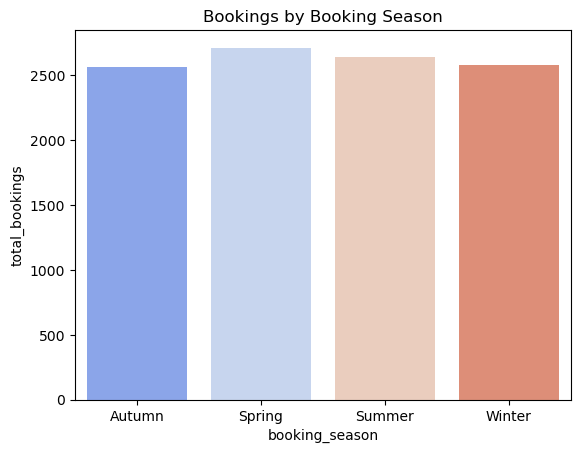

In [12]:
sns.barplot(data=season_summary, x='booking_season', y='total_bookings', palette='coolwarm')
plt.title("Bookings by Booking Season")
plt.show()


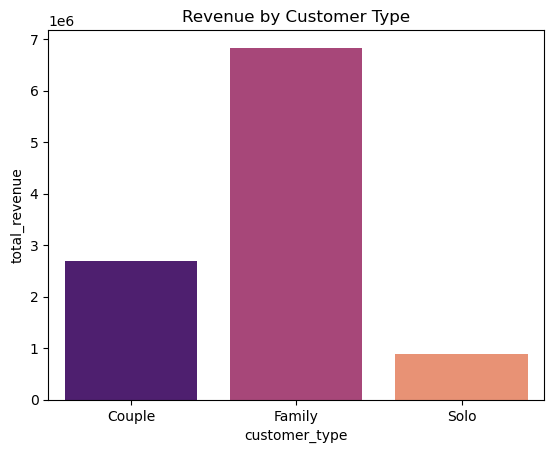

In [13]:
customer_summary = df.groupby('customer_type').agg(
    total_bookings=('booking_number','count'),
    total_revenue=('total_price','sum'),
    avg_revenue_per_guest=('revenue_per_guest','mean')
).reset_index()

sns.barplot(data=customer_summary, x='customer_type', y='total_revenue', palette='magma')
plt.title("Revenue by Customer Type")
plt.show()


In [17]:
df['departure_month'] = pd.to_datetime(df['departure_month'], format='%b-%y')


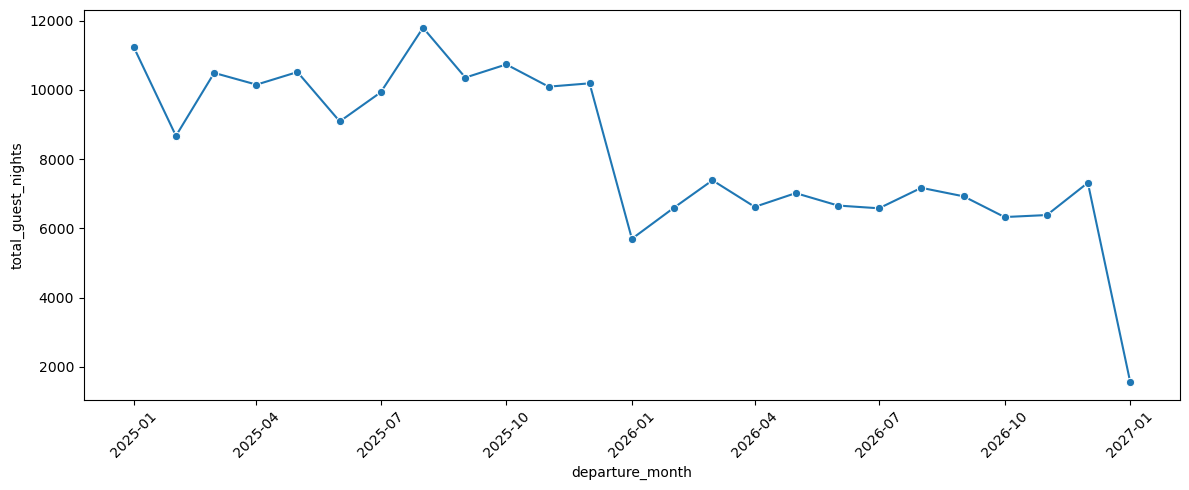

In [18]:
occupancy_summary = df.groupby('departure_month').agg(
    total_guest_nights=('occupancy_weight','sum'),
    total_revenue=('total_price','sum')
).reset_index()

plt.figure(figsize=(12,5))
sns.lineplot(data=occupancy_summary, x='departure_month', y='total_guest_nights', marker='o')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


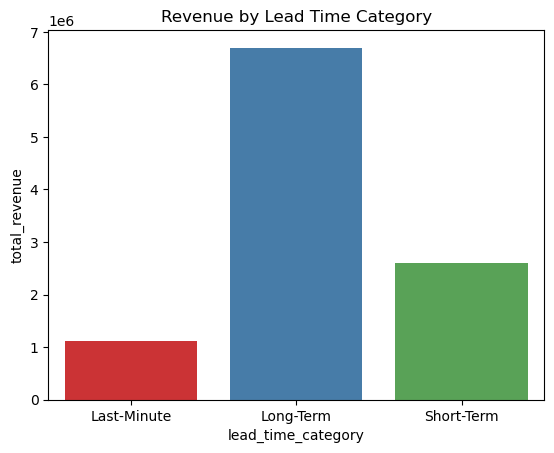

In [19]:
lead_time_summary = df.groupby('lead_time_category').agg(
    total_bookings=('booking_number','count'),
    total_revenue=('total_price','sum')
).reset_index()

sns.barplot(data=lead_time_summary, x='lead_time_category', y='total_revenue', palette='Set1')
plt.title("Revenue by Lead Time Category")
plt.show()


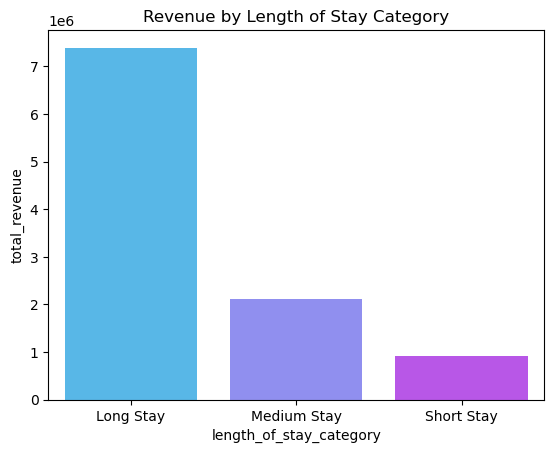

In [20]:
stay_summary = df.groupby('length_of_stay_category').agg(
    total_bookings=('booking_number','count'),
    total_revenue=('total_price','sum'),
    avg_revenue_per_night=('revenue_per_night','mean')
).reset_index()

sns.barplot(data=stay_summary, x='length_of_stay_category', y='total_revenue', palette='cool')
plt.title("Revenue by Length of Stay Category")
plt.show()


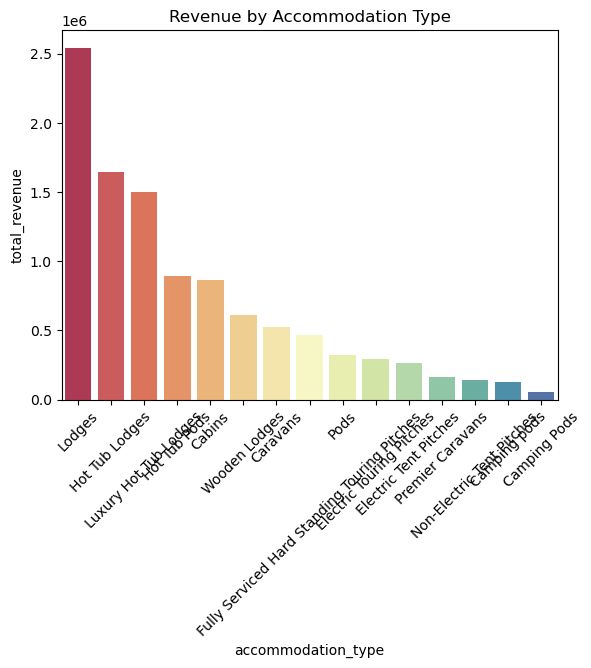

In [21]:
accom_summary = df.groupby('accommodation_type').agg(
    total_bookings=('booking_number','count'),
    total_revenue=('total_price','sum'),
    total_occupancy=('occupancy_weight','sum')
).reset_index().sort_values('total_revenue', ascending=False)

sns.barplot(data=accom_summary, x='accommodation_type', y='total_revenue', palette='Spectral')
plt.title("Revenue by Accommodation Type")
plt.xticks(rotation=45)
plt.show()



In [22]:
import mysql.connector

conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='rabin8866',
    database='customer_booking'
)

cursor = conn.cursor()
print("Connected to MySQL successfully!")


Connected to MySQL successfully!


In [23]:
# Original columns in DataFrame
df.columns


Index(['booking_number', 'booking_date', 'arrival_date', 'departure_date',
       'lead_time', 'length_of_stay', 'adults', 'children', 'infants',
       'total_guests', 'pets', 'accommodation', 'accommodation_type',
       'total_price', 'booking_month', 'departure_month', 'departure_year',
       'booking_season', 'arrival_season', 'customer_type',
       'revenue_per_guest', 'revenue_per_night', 'lead_time_category',
       'length_of_stay_category', 'occupancy_weight'],
      dtype='object')

In [24]:
# Building CREATE TABLE query dynamically
columns = []
for col, dtype in zip(df.columns, df.dtypes):
    if 'int' in str(dtype):
        sql_dtype = 'INT'
    elif 'float' in str(dtype):
        sql_dtype = 'FLOAT'
    elif 'datetime' in str(dtype):
        sql_dtype = 'DATE'
    else:
        sql_dtype = 'VARCHAR(255)'
    columns.append(f"`{col}` {sql_dtype}")

create_table_query = f"""
CREATE TABLE IF NOT EXISTS holiday_bookings_full (
    {', '.join(columns)}
);
"""

cursor.execute(create_table_query)
conn.commit()
print("Table created successfully!")


Table created successfully!


In [25]:
cols = ",".join([f"`{c}`" for c in df.columns])
placeholders = ",".join(["%s"] * len(df.columns))
insert_query = f"INSERT INTO holiday_bookings_full ({cols}) VALUES ({placeholders})"

data_tuples = [tuple(x) for x in df.to_numpy()]
cursor.executemany(insert_query, data_tuples)
conn.commit()

print(f"{cursor.rowcount} rows imported successfully!")


10498 rows imported successfully!
